In [1]:
# Загружаем библиотеки:
# для работы с математикой
import numpy as np
# для построения графиков
import matplotlib.pyplot as plt 
# для оптимизации (минимизации) функций
from scipy.optimize import minimize

In [2]:
# Фиксируем начальное условие для генератора случайных чисел
np.random.seed(42)

In [3]:
# Функция Растригина
# Входные параметры: список точек x1 ... xn и параметр A
# Возвращает список значений функции
def rastrigin(X, A = 10):
    # Количество размерностей
    d = len(X)
    # Перебираем каждую точку в списке входных значений и получаем значение функции
    return (A * d + sum(x ** 2 - A * np.cos(2 * np.pi * x) for x in X))

In [4]:
# Координатная сетка 

# Пределы значений в каждой из размерностей и шаг
low_limit = -5.12
high_limit = 5.12
step = 0.01

# Координатная сетка для размерности d = 2
x1 = np.arange(low_limit, high_limit + step, step)
x2 = np.arange(low_limit, high_limit + step, step)
X1, X2 = np.meshgrid(x1, x2)

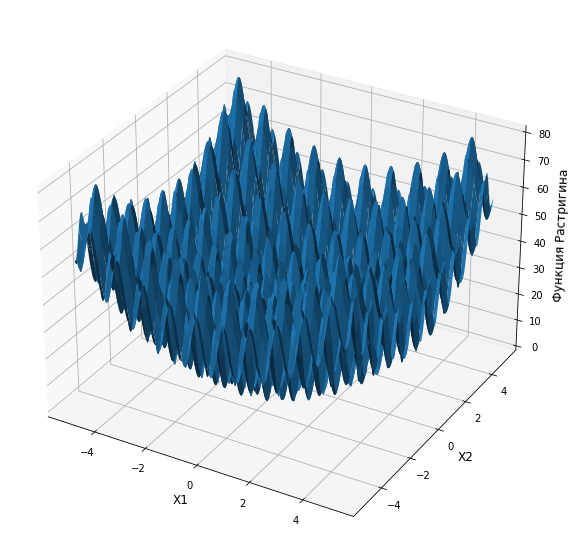

In [5]:
# График функции
Z = rastrigin([X1, X2])

# Размеры поля графика
fig = plt.figure(figsize = (10, 10)) 
# Используем 3D-проекцию 
ax = fig.gca(projection = '3d')

# Изображение графика функции
ax.plot_surface(X1, X2, Z)

# Подписи осей
ax.set_xlabel('X1', fontsize = 'large')
ax.set_ylabel('X2', fontsize = 'large')
ax.set_zlabel('Функция Растригина', fontsize = 'large')

plt.show()

In [6]:
# Выполняем 100 экспериметнтов для размерности d = 2
d = 2

# Количество итераций для размерности 2
iterations_d2 = []
# Значения цйелевой функции для размерности 2
results_d2 = []

# Количество экспериментов: 100
for i in range(100):
    # Начальная точка
    x0 = np.random.uniform(-5, 5, d)
    # Функция минимизации, метод Нелдера-Мида
    res = minimize(rastrigin, x0, method = 'nelder-mead', options = {'xtol': 1e-8, 'disp': False})
    # Записываем результаты
    iterations_d2.append(res.nit)
    results_d2.append(rastrigin(res.x))

In [7]:
# Выполняем 100 экспериметнтов для размерности d = 4
d = 4

# Количество итераций для размерности 4
iterations_d4 = []
# Значения цйелевой функции для размерности 4
results_d4 = []

# Количество экспериментов: 100
for i in range(100):
    # Начальная точка
    x0 = np.random.uniform(-5, 5, d)
    # Функция минимизации, метод Нелдера-Мида
    res = minimize(rastrigin, x0, method = 'nelder-mead', options = {'xtol': 1e-8, 'disp': False})
    # Записываем результаты
    iterations_d4.append(res.nit)
    results_d4.append(rastrigin(res.x))

In [8]:
print('\t' * 6 + 'd = 2\td = 4')
print(f'Среднее значение целевой функции\t\t{np.round(np.mean(results_d2), 3)}\t{np.round(np.mean(results_d4), 3)}')
print(f'Минимальное найденное значение целевой функции\t{np.round(np.min(results_d2), 3)}\t{np.round(np.min(results_d4), 3)}')
print(f'Среднее число итераций\t\t\t\t{np.ceil(np.mean(iterations_d2))}\t{np.ceil(np.mean(iterations_d4))}')
print('\nАлгоритм не справился с поиском минимума при размерности d = 2! С увеличением размерности результаты ухудшаются.')

						d = 2	d = 4
Среднее значение целевой функции		18.267	38.166
Минимальное найденное значение целевой функции	0.995	2.985
Среднее число итераций				62.0	186.0

Алгоритм не справился с поиском минимума при размерности d = 2! С увеличением размерности результаты ухудшаются.
